In [14]:
import pandas as pd
import seaborn as sb

In [15]:
houseData = pd.read_csv("train.csv")

In [16]:
houseGrLivArea = pd.DataFrame(houseData['GrLivArea'])
houseSalePrice = pd.DataFrame(houseData['SalePrice'])

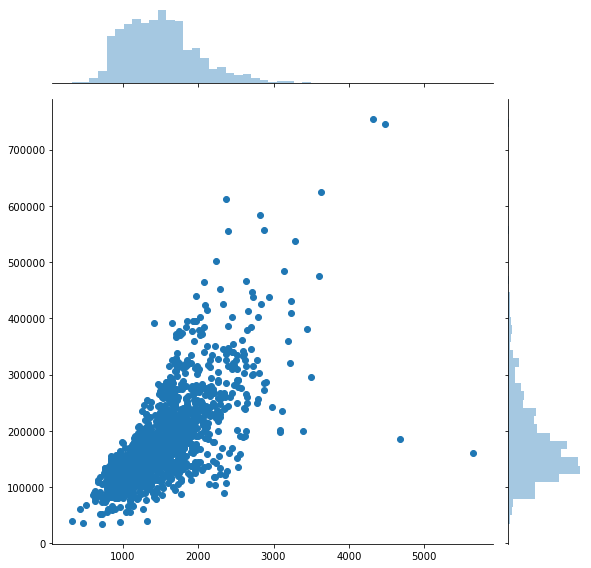

In [17]:
sb.jointplot(x=houseGrLivArea, y=houseSalePrice, height=8)

In [20]:
numDF = pd.concat([houseGrLivArea, houseSalePrice], axis=1)
numDF.head()

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


In [22]:
numDF.corr()

,GrLivArea,SalePrice
GrLivArea,1.000000,0.708624
SalePrice,0.708624,1.000000


In [24]:
from sklearn.linear_model import LinearRegression

In [27]:
houseGrLivArea_train = houseGrLivArea.iloc[:1100]
houseSalePrice_train = houseSalePrice.iloc[:1100]
houseGrLivArea_test = houseGrLivArea.iloc[-360:]
houseSalePrice_test = houseSalePrice.iloc[-360:]

In [30]:
print("The number of rows of two training sets is: ", houseGrLivArea_train.shape[0], houseSalePrice_train.shape[0])
print("The number of rows of two test sets is: ", houseGrLivArea_test.shape[0], houseSalePrice_test.shape[0])

The number of rows of two training sets is:  1100 1100
The number of rows of two test sets is:  360 360


In [32]:
linReg = LinearRegression()
linReg.fit(houseGrLivArea_train, houseSalePrice_train)

LinearRegression()

In [33]:
print("Intercept b = ", linReg.intercept_)
print("Coefficients a = ", linReg.coef_)

Intercept b =  [9498.33463562]
Coefficients a =  [[113.88950443]]


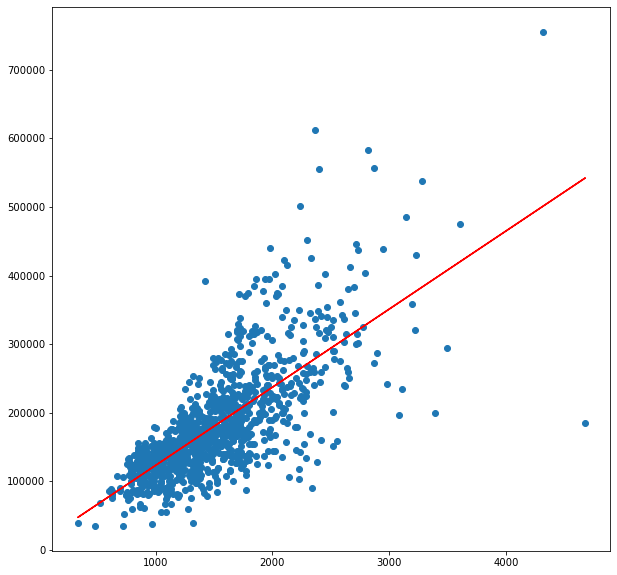

In [41]:
import matplotlib.pyplot as plt

price_train_pred = linReg.predict(houseGrLivArea_train)

f, axes = plt.subplots(1, 1, figsize=(10, 10))
plt.scatter(houseGrLivArea_train, houseSalePrice_train)
plt.plot(houseGrLivArea_train, price_train_pred, color='red')

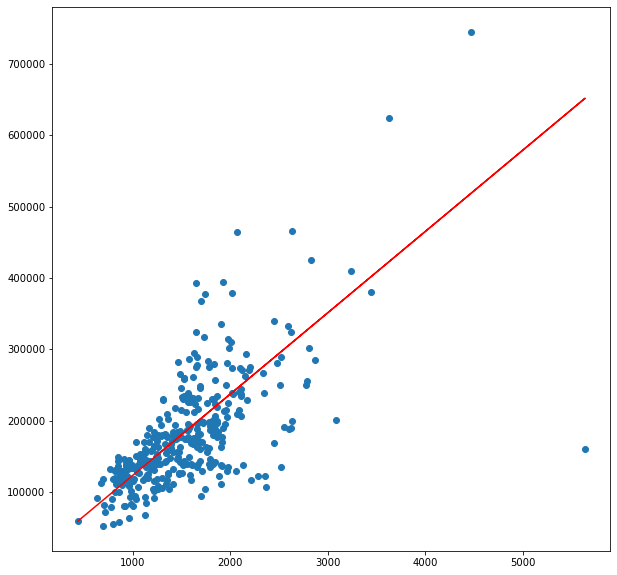

In [42]:
f, axes = plt.subplots(1, 1, figsize=(10, 10))

price_test_pred = linReg.predict(houseGrLivArea_test)
plt.scatter(houseGrLivArea_test, houseSalePrice_test)
plt.plot(houseGrLivArea_test, price_test_pred, color='red')

In [47]:
from sklearn.metrics import mean_squared_error

print("Training Set")
print("Explained Variance (R^2): ", linReg.score(houseGrLivArea_train, houseSalePrice_train))
print("MSE: ", mean_squared_error(houseSalePrice_train, price_train_pred))

print("Test Set")
print("Explained Variance (R^2): ", linReg.score(houseGrLivArea_test, houseSalePrice_test))
print("MSE: ", mean_squared_error(houseSalePrice_test, price_test_pred))

Training Set
Explained Variance (R^2):  0.5317704755454566
MSE:  2962940662.7214036
Test Set
Explained Variance (R^2):  0.40117720006925783
MSE:  3737081522.29609


Intercept of Regression 	: b1 =  [160975.98640072]
Coefficients of Regression 	: a1 =  [[2.03017613]]
Intercept of Regression 	: b2 =  [48368.97362611]
Coefficients of Regression 	: a2 =  [[126.60324705]]
Intercept of Regression 	: b3 =  [71510.88156243]
Coefficients of Regression 	: a3 =  [[232.7032815]]
Goodness of Fit of Model 	Train Dataset (LotArea)
Explained Variance (R^2) 	: 0.06770035147302733
Mean Squared Error (MSE) 	: 6142369701.7304945
Goodness of Fit of Model 	Train Dataset (TotalBsmtSF)
Explained Variance (R^2) 	: 0.43092625805740825
Mean Squared Error (MSE) 	: 3769158426.9091516
Goodness of Fit of Model 	Train Dataset (GarageArea)
Explained Variance (R^2) 	: 0.39466512856304625
Mean Squared Error (MSE) 	: 3781152857.227481


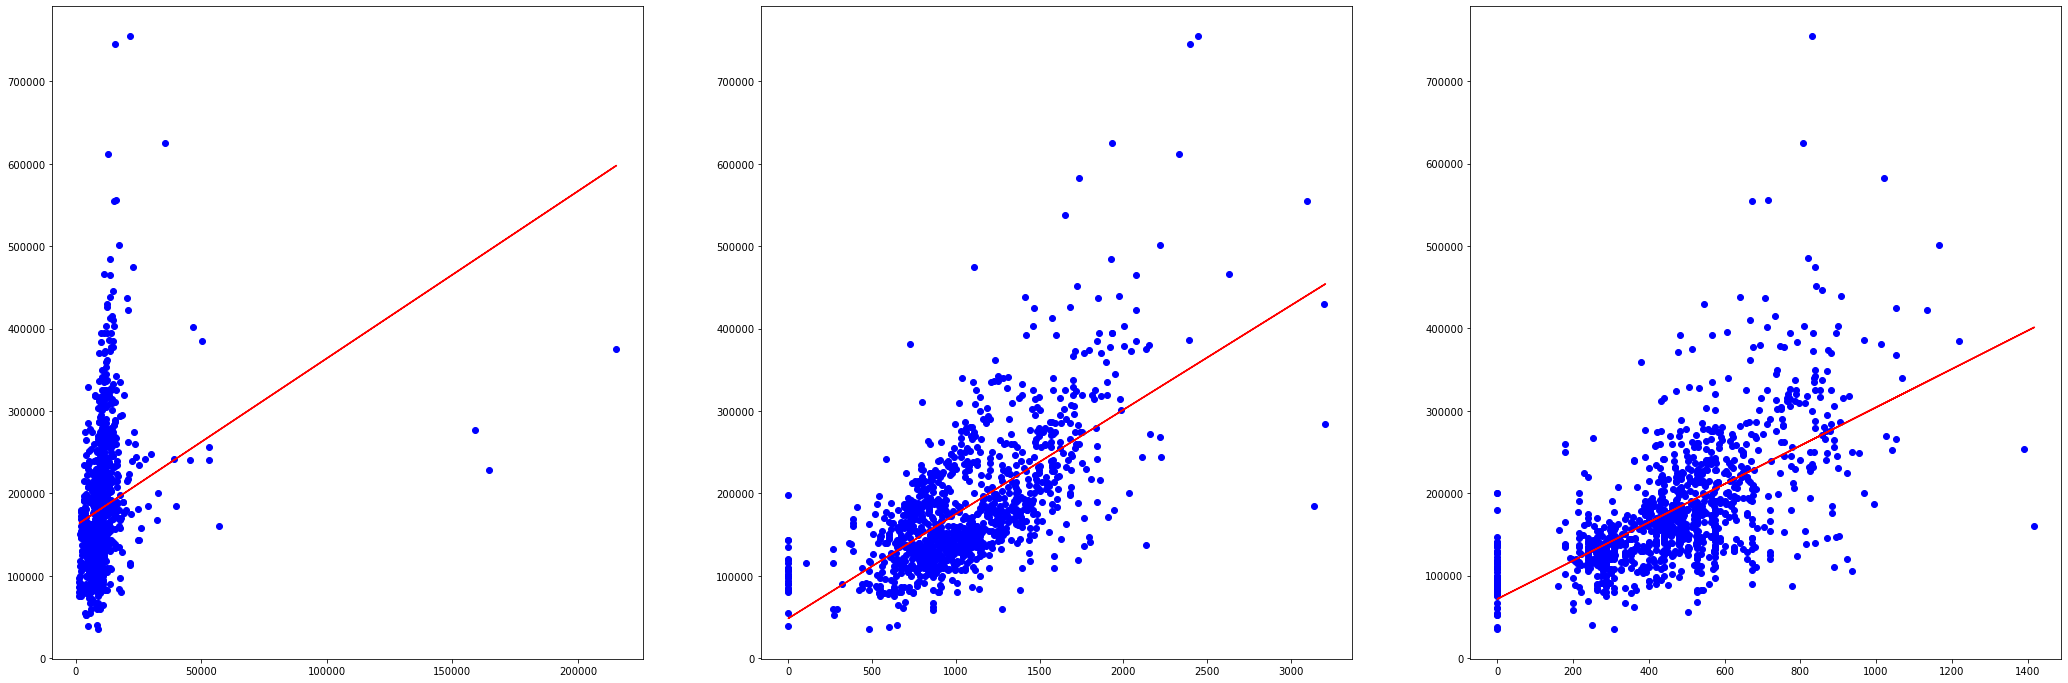

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

SaleData = pd.DataFrame(houseData['SalePrice'])
LotArea = pd.DataFrame(houseData['LotArea'])
TotalBsmtSF = pd.DataFrame(houseData['TotalBsmtSF'])
GarageArea = pd.DataFrame(houseData['GarageArea'])

lot_train, lot_test, sale_train_1, sale_test_1= train_test_split(LotArea, SaleData, test_size = 0.25)
total_train, total_test, sale_train_2, sale_test_2 = train_test_split(TotalBsmtSF, SaleData, test_size = 0.25)
garage_train, garage_test, sale_train_3, sale_test_3 = train_test_split(GarageArea, SaleData, test_size = 0.25)

linreg_1 = LinearRegression()
linreg_2 = LinearRegression()
linreg_3 = LinearRegression()

linreg_1.fit(lot_train, sale_train_1)
linreg_2.fit(total_train, sale_train_2)
linreg_3.fit(garage_train, sale_train_3)

print('Intercept of Regression \t: b1 = ', linreg_1.intercept_)
print('Coefficients of Regression \t: a1 = ', linreg_1.coef_)

print('Intercept of Regression \t: b2 = ', linreg_2.intercept_)
print('Coefficients of Regression \t: a2 = ', linreg_2.coef_)

print('Intercept of Regression \t: b3 = ', linreg_3.intercept_)
print('Coefficients of Regression \t: a3 = ', linreg_3.coef_)

sale_train_pred_1 = linreg_1.predict(lot_train)
sale_train_pred_2 = linreg_2.predict(total_train)
sale_train_pred_3 = linreg_3.predict(garage_train)

sale_test_pred_1 = linreg_1.predict(lot_test)
sale_test_pred_2 = linreg_2.predict(total_test)
sale_test_pred_3 = linreg_3.predict(garage_test)

print("Goodness of Fit of Model \tTrain Dataset (LotArea)")
print("Explained Variance (R^2) \t:", linreg_1.score(lot_train, sale_train_1))
print("Mean Squared Error (MSE) \t:", mean_squared_error(sale_train_1, sale_train_pred_1))

print("Goodness of Fit of Model \tTrain Dataset (TotalBsmtSF)")
print("Explained Variance (R^2) \t:", linreg_2.score(total_train, sale_train_2))
print("Mean Squared Error (MSE) \t:", mean_squared_error(sale_train_2, sale_train_pred_2))

print("Goodness of Fit of Model \tTrain Dataset (GarageArea)")
print("Explained Variance (R^2) \t:", linreg_3.score(garage_train, sale_train_3))
print("Mean Squared Error (MSE) \t:", mean_squared_error(sale_train_3, sale_train_pred_3))


f, axes = plt.subplots(1, 3, figsize=(36, 12))
axes[0].scatter(lot_train, sale_train_1, color="blue")
axes[1].scatter(total_train, sale_train_2, color="blue")
axes[2].scatter(garage_train, sale_train_3, color="blue")

axes[0].plot(lot_train, sale_train_pred_1, color="red")
axes[1].plot(total_train, sale_train_pred_2, color="red")
axes[2].plot(garage_train, sale_train_pred_3, color="red")

plt.show()